# Project 1: Data analysis

## 1a) Bayesian approch

In order to predict the effect of genes on symptoms, we will use a simple Bayesian model. We consider these hypothesis:

$$\mu_0: P(symptoms|genes) = P(symptoms)$$
$$\mu_1: P(symptoms|genes) \neq P(symptoms)$$

In order words, does the genes have any effect on the symptoms or not? If it does, which genomes are the most relevant for the preventing the symptoms? 


We let Y be the symptoms and our X the genes. Y is an 8 bit vector for each observation,with 1 or zero for each bit. X is an 128 with the same charectaristic as Y.


The probability distribution of $ Y $ depends on an unknown parameter that we assume to be stochastic. We call this unknown parameter $\theta$ or $ p $. 

The formulation under is an alternative formulation of the the previous hypotesis. Does the parameter that the probability distribution of Y depend on, depend on X or not. $ \mu_0 $, our null, says that it does not. $\mu_1 $, the alternative hypothesis claims it does. We assume the Beta-Bernoulli model:
 
$$\mu_0: \theta^0 \sim Beta(\alpha^0 , \beta^0) ,  \ \ \  Y | \theta^0  $$
$$\mu_1: \theta^{1,x_t} \sim Beta(\alpha^{1,x_t} , \beta^{1,x_t}) , \ \ \ y_t | x_t \sim bernoulli(\theta^{1,x_t}) $$
 

Given the data, D, we try to estimate

$$ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_1}(D) \cdot \xi(\mu_1)} $$

We can either set $P(\mu | D)$ to mean $P(\mu_1 | D)$ or  $P(\mu_0 | D)$ depending on which hypothesis we want to check the posterior belief of. 

We let $P_{\mu} (D) = P(\mu |D)$, $D = (x_t, y_t,x_{t-1},y_{t-1})_{t=1} ^T $ for a spesific gene, and let $x_t$ be the value of the gene for observation t (0  or 1), $x_{t-1}$ is a vector of all the previous values of the previous observation up to t-1,  $y_t$ is the the value of symptom Y for observation t (0 or 1),$y_{t-1}$ is a vector of all the previous values of the previous observations including t-1 and $\mu$ is one of the hypothesis in the set {$\mu_1$,$\mu_0$}.  We assume that the different observations(rows) of the data are independent of each other. This gives us:
$$ P_{\mu}(D) = P(y_1,...,y_t \cup x_1,...,x_t)$$

$$ = \prod_{i=1}^{t} P(y_i | x_i,x_{i-1} , y_{i-1}) $$


With these assumptions, we can estimate the terms in the $P_{\mu} (D)$ by 
$$ P(y_t | x_t,x_{t-1} , y_{t-1}) = \int_{\theta} P_{\theta}(y_t|x_t) \cdot \xi(\theta|x_{t-1},y_{t-1})$$

We calculate the likehood of adding a new observation(row) using this formula. It works if we assume that the the next observation is independent from the previous observations.


This is the marginal likelihood(posterior predictive distribution) which is a compound distribution,which is used to calculate $P(y_t | x_{t},x_{t-1}, y_{t-1})$. The probabilty $P(y_t | x_{t})$ is stochastic in $\theta$, so we have to integrate over all values of $\theta$. Every time a new observation is added we calculate $P(y_t | x_{t},x_{t-1}, y_{t-1})$,and recalculate $$ = \prod_{i=1}^{t} P(y_i | x_i ,x_{i-1}, y_{i-1}) $$. 

So to calculate $$ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_i}(D) \cdot \xi(\mu_i)} $$, we are sequentially updating our belief every time a new observation is added. For every update $\xi(\mu)$, $P(\mu | D)$ is from the previous iteration, exept for the first one. $\xi(\mu)$ will cancel because it's constant.

This integral simplifies to:

$$ P(y_t | x_{t},x_{t-1},y^{t-1}) = \int_{\theta} P_{\theta}(y_t) \cdot d \xi(\theta|y^{t-1}) = \frac{\alpha_{t,x_t}}{\alpha_{t,x_t} + \beta_{t,x_t}}$$


Looking at $\mu_1$ we are using the Beta-Bernoulli distribution. Its a binomial distribution where the probability of success at each of n trials is not fixed but comes from a Beta distribution. The Bernoulli distribtuion is a special case of the binomial distribution, where number of trials is equal to 1.

We are doing this because our y's are either 1 or 0. It is then reasonable to assume that $Y|X$ is Bernoulli distributed.

It is also conviniant because of its conjugate prior property. Now we can calculate $P( D | \mu_1) = \prod_{i=1}^{t} P(y_i | x^i ,x^{i-1}, y^{i-1}) $ beacuse we know that the marginal likelihood (posterior predictive dist) is composed of a Bernoulli distribution and a Beta dist $ P(y_t | x^t , y^{t-1}) = \int_{\theta} P_{\theta}(y_t|x_t) \cdot \xi(\theta|x^{t-1},y^{t-1})$, which is beta distributed. For each iteration we end up getting that $P_{\mu} (D)$ is Beta distributed.

The same integral calculation is done for $P(D | \mu_0)$ but now the marginal likelihood is independent of the data.

Instead of calculating $P(D |\mu_1) = \prod_{i=1}^{t} P(y_i | x_i ,x_{i-1}, y_{i-1})$, we can first calculate $log(P(  D|\mu_1))$ and then do $e^{log(P(D|\mu_1))}$,same for $P(D | \mu_0)$.

To summarize, we have a set of hypotesis. In this case two. We want to find how accurate they are, so we have a prior beleif on the strength of the hypothses which we express through a probability. We then want to update our belief of the hypotesis (posterior belief). In other words what is the probability of the choosen hypotesis given the data. We only have to compute one of the probabilities because $P(\mu_1)= 1 - P(\mu_0)$.

The calculation is done sequentially. For each iteration we get a new data observation.A new row of genes.We continously update the posterior belief,for all genes,and put the posterior belief of each gene into a list. The belief get updated through calculating the marginal likelihood every time a new row is added and a product is taken between this marginal likelihood and all the presious marginal likelihood calculations bought for $P(  D|\mu_1)$ and for$P(  D|\mu_0)$ this is then put into the bayes formula $ P(\mu | D) = \frac{P_{\mu} (D) \cdot \xi(\mu)}{\sum_{i=1} ^n P_{\mu_i}(D) \cdot \xi(\mu_i)} $.

We want to find this probability for for each of the genes.This procedure is done for each gene.For each gene if the posterior probabilty is greater then some trechhold we add this gene to the list of important genes that are relvant for explaining that spesific symptom.
 



The decision rule can be defined as

$$ \mu =   \left\{
\begin{array}{ll}
      \mu_1 & P(\mu_1|D) > s \\
      \mu_0 & else
\end{array} 
\right.  $$

where $s$ is a given threshold.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [299]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import resample

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

from imblearn.pipeline import make_pipeline

In [4]:
cols = (['Covid-Recovered', 'Covid-Positive', 'No-Taste/Smell', 'Fever', 'Headache', 'Pneumonia', 'Stomach', 'Myocarditis', 'Blood-Clots', 'Death', 
        'Age', 'Gender', 'Income'] + 
         [f'Gene_{i+1:03}' for i in range(128)] + 
         ['Asthma', 'Obesity', 'Smoking', 'Diabetes', 'Heart disease', 'Hypertension',
         'Vacc_1', 'Vacc_2', 'Vacc_3'])


In [5]:
obs_data = pd.read_csv("observation_features.csv")
treat_data = pd.read_csv("treatment_features.csv") 
action_data = pd.read_csv("treatment_actions.csv")
outcome_data = pd.read_csv("treatment_outcomes.csv") 

obs_data.columns = cols
treat_data.columns = cols
outcome_data.columns = cols[:10]
action_data.columns = ['Treatment_1', 'Treatment_2']

In [408]:
class Pipeline:
    
    def __init__(self, X, y, random_state=None):
        self.X = X
        self.y = y
        self.random_state = random_state
    
    def generate_binary_data(self, num_features, N, correlation=[0.9, 0.5]):
        """"""
        
        data = np.random.choice(2, size=(N, num_features))
        df = pd.DataFrame(data)
        df["Target"] = np.zeros(N).astype(int)
        for i, cor in enumerate(correlation):
            if i >= num_features:
                break
                
            df["Target"] |= df.iloc[:, i] * np.random.choice(2, size=N, p=[(1-cor), cor])
            
        return df.iloc[:, :num_features], df["Target"]
    
    
    def select_features(self, X, Y, threshold):
        X, Y = np.array(X), np.array(Y)
        
        n_features = X.shape[1]
        n_data =  X.shape[0]
        alpha_b = np.ones([n_features, 2 ])
        beta_b = np.ones([n_features, 2])
        log_p = np.zeros(n_features)

        log_null = 0
        alpha = 1
        beta = 1  
        for t in range(n_data):
            p_null = alpha / (alpha + beta)
            log_null += np.log(p_null)*Y[t] + np.log(1-p_null)*(1 - Y[t])
            alpha += Y[t]
            beta += (1 - Y[t])
            for i in range(n_features):

                    x_ti = int(X[t,i])
                    p = alpha_b[i, x_ti] / (alpha_b[i, x_ti] + beta_b[i, x_ti])
                    log_p[i] += np.log(p)*Y[t] + np.log(1-p)*(1 - Y[t])
                    alpha_b[i, x_ti] += Y[t]
                    beta_b[i, x_ti] += (1 - Y[t])
        log_max=np.mean(log_p)
        log_max2=np.mean(log_null)
        log_p=log_p-log_max
        log_null=log_null-log_max2
        #p = np.exp(log_p) / (np.exp(log_p) + np.exp(log_null))
        p = 1 / (np.exp(log_null - log_p) + 1)
        #print(f"{(log_p)=}\n{(log_null)=}\n{(log_p) + (log_null)=}\n {p=}")
        #print(f"{np.exp(log_p)=}\n{np.exp(log_null)=}\n{np.exp(log_p) + np.exp(log_null)=}")

        features = [i for i in range(n_features) if p[i] > threshold]

        return features
    
        
    def tune_parameters(self, X, y, clf, parameter_grid, scoring=None, cv=None):
        # The code here is from
        # https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=self.random_state)

        print(f"# Tuning hyper-parameters for {scoring}")
        print()

        clf = GridSearchCV(     clf, 
                                parameter_grid, 
                                scoring=scoring,
                                n_jobs=-1,
                                cv=cv
                            ).fit(X_train, y_train)

        #piped_clf

        print("Best parameters set found on development set:")
        print()
        print(f"{clf.best_params_}, score: {clf.best_score_:.4f}")
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()



        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()

        print(classification_report(y_test, clf.predict(X_test)))
        print()
        
        
    def find_alpha(self, beta,p):
        return beta*p/(1-p)

    def find_efficacy(self, group_pos: pd.DataFrame, group_neg: pd.DataFrame, symptom, prior_probs):
        if isinstance(symptom, int):
            symptom_index = symptom
            symptom_name = group_pos.keys()[symptom]
        else:
            symptom_name = symptom
            symptom_index = list(group_pos.keys()).index(symptom)
        
        group_pos_count = np.sum(group_pos[symptom_name] * group_pos.iloc[:,1])
        group_neg_count = np.sum(group_neg[symptom_name] * group_neg.iloc[:,1])

        v = group_pos_count/len(group_pos)
        n_v = group_neg_count/len(group_neg)

        if n_v == 0:
            print('Division by zero')
            return

        IRR = v/n_v

        #print(v, n_v)
        efficacy = 100*(1- IRR)

        N = 100_000
        beta = 1
        p = prior_probs[symptom_index]
        alpha = self.find_alpha(beta,p)

        samples_group_pos = stats.beta.rvs(alpha + group_pos_count, beta + len(group_pos) - group_pos_count, size=N)
        samples_group_neg = stats.beta.rvs(alpha + group_neg_count, beta + len(group_neg) - group_neg_count, size=N)

        samples_ve = 100 * (1 - samples_group_pos/samples_group_neg)
        lower = np.percentile(samples_ve, 2.5)
        upper = np.percentile(samples_ve, 97.5)
        print(f'{symptom_name:15s}: {efficacy:3.3f} - ({lower:3.3f}, {upper:3.3f})')  
        
        
    def side_effects(self, vacced_neg, un_vacced_neg, start, end):
        df = pd.DataFrame(index=vacced_neg.keys()[start:end], 
                          columns = ("p1 (%)", "p2 (%)", "Diff (%)", "Credible Interval (%)", "Null Hypothesis"),
                         )
        
        #df["Credible Interval (%)"] =  df["Credible Interval (%)"].astype(object)
        
        for i in range(start, end):
            symptom = vacced_neg.keys()[i]
            p1 = vacced_neg.sum()[i] / len(self.y) / (len(vacced_neg) / len(self.y))
            p2 = un_vacced_neg.sum()[i] / len(self.y) / (len(un_vacced_neg) / len(self.y))
            
            
            
            lower = (p1-p2 - 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
            higher = (p1-p2 + 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
            
            p1, p2, lower, higher = p1 * 100, p2 * 100, lower * 100, higher * 100
            
            df.loc[symptom] = [round(p1, 4), round(p2, 4), round(p1 - p2, 4), (round(lower, 4), round(higher, 4)),
                               "rejected" if lower>0 else "not rejected"]

        return df
    
    
    def treatment_efficacy(self, outcome_treated, precondition_treated, outcome_untreated, precondition_untreated, p, symptom_name):
        group_pos_count = np.sum(outcome_treated[symptom_name])
        group_neg_count = np.sum(outcome_untreated[symptom_name])

        group_pos_total = np.sum(precondition_treated[symptom_name])
        group_neg_total = np.sum(precondition_untreated[symptom_name])

        if any(v == 0 for v in (group_pos_total, group_neg_total, group_neg_count)):
            print(f'{symptom_name:15s}: Division by zero - not enough data to compute efficacy' )
            return

        v = group_pos_count / group_pos_total
        n_v = group_neg_count / group_neg_total

        print(f"{group_pos_count=}, {group_pos_total=}\n {group_neg_count=} {group_neg_total=}\n, {v=}, {n_v=}")

        IRR = v/n_v

        efficacy = (1- IRR)

        N = 100_000
        beta = 1
        p
        alpha = self.find_alpha(beta,p)

        #symptom_name = symptom_names[symptom_index]

        samples_group_pos = stats.beta.rvs(alpha + group_pos_count, beta + len(outcome_treated) - group_pos_count, size=N)
        samples_group_neg = stats.beta.rvs(alpha + group_neg_count, beta + len(outcome_untreated) - group_neg_count, size=N)

        samples_ve = (1 - samples_group_pos/samples_group_neg)
        lower = np.percentile(samples_ve, 2.5)
        upper = np.percentile(samples_ve, 97.5)
        print(f'{symptom_name:15s}: {efficacy:7.3f} - 95% CI: ({lower:3.3f}, {upper:3.3f})')    

    def bootstrap(self, X=None, y=None, N=None):
        if X is None:
            X = self.X
        if y is None:
            y = self.y
            
        return resample(X, y, n_samples=N)
    
        

In [409]:
pipe = Pipeline(obs_data.iloc[:, :10], obs_data.iloc[:, 11])
"""X, y = pipe.generate_binary_data(100, 1000)
best_features = pipe.select_features(X, y, 0.8)
pipe.tune_parameters(X.iloc[:, best_features], y, SVC(), parameter_grid = [{'kernel': ['poly', 'rbf'],
                     'C': [0.01, 0.1,1, 10, 100,],
                     'gamma': [.1, .01, 1e-3]}, ])"""

pipe.side_effects(vacced_neg, un_vacced_neg, 2, 10)

C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,p1 (%),p2 (%),Diff (%),Credible Interval (%),Null Hypothesis
No-Taste/Smell,0.0812,0.0568,0.0243,"(-0.0067, 0.0554)",not rejected
Fever,9.9028,0.5081,9.3947,"(9.1613, 9.6281)",rejected
Headache,5.5788,1.053,4.5258,"(4.3287, 4.7229)",rejected
Pneumonia,0.1332,0.1437,-0.0106,"(-0.0557, 0.0345)",not rejected
Stomach,0.231,0.2574,-0.0264,"(-0.0864, 0.0336)",not rejected
Myocarditis,0.2143,0.0468,0.1675,"(0.1273, 0.2077)",rejected
Blood-Clots,0.2435,0.1103,0.1331,"(0.0847, 0.1816)",rejected
Death,0.0354,0.0,0.0354,"(0.0213, 0.0494)",rejected


In [438]:
pipe.treatment_efficacy(y[X[0] == 1], X[X[0] == 1], y[X[0] == 0], X[X[0] == 0], prior_prob, 'Target')

group_pos_count=0, group_pos_total=2511
 group_neg_count=2492 group_neg_total=2492
, v=0.0, n_v=1.0
Target         :   1.000 - 95% CI: (0.998, 1.000)


In [394]:
prior_prob = np.sum(X.Target) / len(y)
prior_prob

0.55

In [427]:
X, y = pipe.generate_binary_data(2, 10000, correlation =[0, 0.1])
X.columns = [0, 'Target']
y = pd.DataFrame(y)
test = X.copy()
test['after'] = y
test


,0,Target,after
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
9995,1,1,0
9996,1,1,0
9997,1,0,0
9998,1,1,0


In [437]:
y = ((X[0]) ^ np.ones(len(X)).astype(int)) * X.Target
y = pd.DataFrame(y, columns=['Target'])

In [436]:
pd.DataFrame(y, columns=['Target'])

,Target
0,1
1,1
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [390]:
 y[X[0] == 0]['Target']

0     0
1     0
3     0
4     0
5     0
7     0
10    0
12    0
13    0
14    0
17    0
19    0
20    1
23    0
24    0
26    0
28    0
30    1
33    0
36    0
38    0
39    0
42    1
43    0
48    0
52    0
56    0
59    0
60    0
61    0
62    0
68    0
69    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    1
83    0
84    0
85    0
87    0
89    0
90    0
93    0
95    0
Name: Target, dtype: int32

In [386]:
y = pd.DataFrame(y)
y

,Target
0,0
1,0
2,1
3,0
4,0
...,...
95,0
96,0
97,1
98,0


In [288]:
pd.DataFrame?

In [227]:
pipe.find_efficacy(vacced,un_vacced,9,prior_probs)

1000000

In [261]:
df = pd.DataFrame(index=vacced_neg.keys()[2:10], columns = ('Symptom', "p1", "p2", "Diff", "Credible Interval", "Null Hypothesis"))
df.iloc[0] = [2, 3, 4, 5, 6, 7]
df.loc['No-Taste/Smell']
df

,Symptom,p1,p2,Diff,Credible Interval,Null Hypothesis
No-Taste/Smell,2,3,4,5,6,7
Fever,NaN,NaN,NaN,NaN,NaN,NaN
Headache,NaN,NaN,NaN,NaN,NaN,NaN
Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
Stomach,NaN,NaN,NaN,NaN,NaN,NaN
Myocarditis,NaN,NaN,NaN,NaN,NaN,NaN
Blood-Clots,NaN,NaN,NaN,NaN,NaN,NaN
Death,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
symptoms = np.array(obs_data.iloc[:,0:10])
age = obs_data.iloc[:,10]
gender = obs_data.iloc[:,11]
income = obs_data.iloc[:,12]
genome = obs_data.iloc[:,13:141]
comorbidities = obs_data.iloc[:,141:147]
vaccination_status = np.array(obs_data.iloc[:,147:])

In [196]:
GridSearchCV?

In [118]:
select_0 = select_features(np.array(un_vacced_pos.iloc[:,13:147]),np.array(un_vacced_pos['No-Taste/Smell']), 0.8)

In [119]:
select_0

[19, 53, 60, 76, 85, 96, 120]

In [134]:
# np.array(select_0)+13
X, y = un_vacced_pos.iloc[:, 10:11].astype(np.bool_), un_vacced_pos['Death']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =912)

In [135]:
un_vacced_pos.iloc[:, 141].sum() / 10000

0.0735

In [136]:
obs_data

,Covid-Recovered,Covid-Positive,No-Taste/Smell,Fever,Headache,Pneumonia,Stomach,Myocarditis,Blood-Clots,Death,...,Gene_128,Asthma,Obesity,Smoking,Diabetes,Heart disease,Hypertension,Vacc_1,Vacc_2,Vacc_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [137]:
clf = SVC()
cross_val_score(clf, X, y)


array([0.97185185, 0.97185185, 0.97183794, 0.97233202, 0.97233202])

In [138]:
clf.fit(X_train, y_train)

SVC()

In [139]:
un_vacced_pos.sum()[:10] 

Covid-Recovered      532.0
Covid-Positive     10122.0
No-Taste/Smell       757.0
Fever                546.0
Headache             120.0
Pneumonia            508.0
Stomach               54.0
Myocarditis          130.0
Blood-Clots          510.0
Death                283.0
dtype: float64

In [140]:
print(classification_report(y_test, clf.predict(X_test),
                           ))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2471
         1.0       0.00      0.00      0.00        60

    accuracy                           0.98      2531
   macro avg       0.49      0.50      0.49      2531
weighted avg       0.95      0.98      0.96      2531



C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
data = np.random.choice(2, size=(1000, 100))
df = pd.DataFrame(data)
symptom = df.iloc[:, 0] |  (df.iloc[:, 1] * np.random.choice(2, size=1000, p=(0.4, 0.6))) 
df['Symptom'] = symptom
df.iloc[:, [0,1,10]][:50]
symptom

In [163]:
symptom = df.iloc[:, 0] |  (df.iloc[:, 1] * np.random.choice(2, size=1000, p=(0.4, 0.6))) 
symptom

0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    0
999    1
Length: 1000, dtype: int32

In [164]:
df['Symptom'] = symptom
df.iloc[:, [0,1,10]][:50]

,0,1,10
0,1,1,0
1,0,1,1
2,0,0,1
3,0,0,0
4,0,0,1
5,1,0,1
6,0,1,1
7,1,1,0
8,1,0,0
9,1,1,1


In [179]:
select_1 = select_features(np.array(df.iloc[:, :100]), symptom, 0.8)
print(select_1)
X, y = np.array(df.iloc[:, select_1]).astype(np.bool_), symptom
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =912)


[0, 1]


# Tuning hyper-parameters for acc

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, score: 0.8960

Grid scores on development set:

0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.668 (+/-0.005) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.852 (+/-0.057) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
0.668 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.668 (+/-0.005) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.668 (+/-0.005) for {'C': 1, 'gamma': 0.1, 'kern

In [142]:
piped_clf = make_pipeline(SMOTE(random_state=912), SVC(**clf.best_params_))
piped_clf.fit(X_train, y_train)

cross_val_score(piped_clf, X, y, n_jobs=-1)

array([0.02814815, 0.02814815, 0.02816206, 0.02766798, 0.02766798])

In [177]:
best_clf = SVC(**clf.best_params_)
best_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [178]:
print(classification_report(y_test, best_clf.predict(X_test),))
print(best_clf.score(X_test, y_test))
cross_val_score(best_clf, X, y, n_jobs=-1)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        85
           1       0.91      1.00      0.95       165

    accuracy                           0.93       250
   macro avg       0.95      0.90      0.92       250
weighted avg       0.94      0.93      0.93       250

0.932


array([0.9  , 0.905, 0.885, 0.905, 0.93 ])

In [145]:
print(classification_report(y_test, piped_clf.predict(X_test),))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2471
         1.0       0.02      1.00      0.05        60

    accuracy                           0.02      2531
   macro avg       0.01      0.50      0.02      2531
weighted avg       0.00      0.02      0.00      2531



C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tellef\Anaconda3\envs\in4080_2021\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([34., 61., 55., 61., 27., 17., 16.,  7.,  2.,  3.]),
 array([ 2.39959796, 11.93614682, 21.47269569, 31.00924455, 40.54579342,
        50.08234228, 59.61889115, 69.15544001, 78.69198887, 88.22853774,
        97.7650866 ]),
 <BarContainer object of 10 artists>)

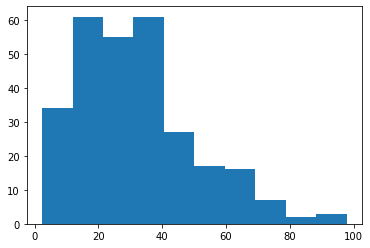

In [151]:
plt.hist(un_vacced_pos[un_vacced_pos.Death == 1].Age)

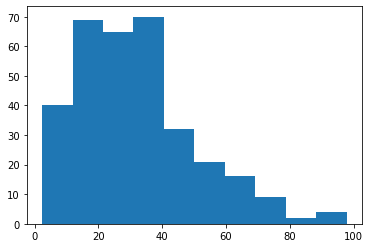

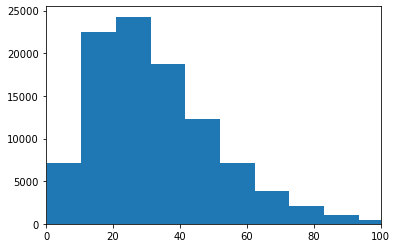

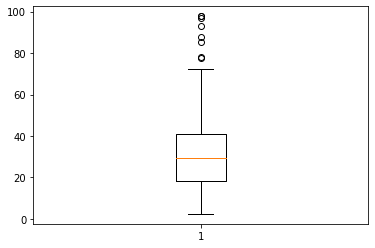

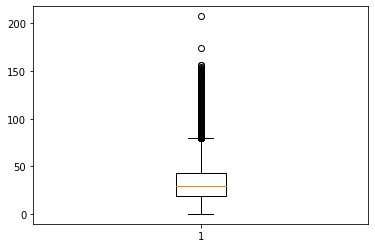

[2.3995979588471585, 18.10491128691597, 29.568870759414743, 40.72956995108035, 97.76508660354524]
[0.1921038988665911, 18.976078137352985, 29.428446744014103, 43.158412640783254, 207.3265152887996]


In [161]:
plt.hist(obs_data[obs_data.Death == 1].Age, bins = 10)
plt.show()
plt.hist(obs_data.Age, bins = 20)
plt.xlim(0, 100)
plt.show()

plt.boxplot(obs_data[obs_data.Death == 1].Age)
plt.show()
plt.boxplot(obs_data.Age)
plt.show()

print([np.percentile(obs_data[obs_data.Death == 1].Age, i * 25) for i in range(5)])
print([np.percentile(obs_data.Age, i * 25) for i in range(5)])

In [ ]:
piped_clf.get_params()

## 1b) Estimating the efficacy of vaccines

We estimate the efficacy of the vaccines by
$$ 100 \cdot (1-IRR)$$
where IRR is the ratio of the vaccinated incidence rate and not vaccinated incidence incidenes ([link](https://www.nejm.org/doi/full/10.1056/NEJMoa2034577)). This means that the relationship we model for each symptom is as given below:

$r_v = P(symptom = 1 | vaccine = 1)$ and

$r_n = P(symptom = 1 | vaccine = 0)$

to obtain $IRR = 100 * [1 - r_v / r_n]$

We obtain a Bayesian estimate of $r_v, r_n$
through the Beta-Bernoulli conjugate prior.

As in the abovementioned article, we use a Bayesian Beta-Binomial model. Hence, our prior belief is assumed to have a Beta distribution and the Likelihood of observed data is Binomial distributed. This results in a Beta-distributed posterior (more details will follow afterwards).

We set a low beta value for the prior distribution because we are uncertain about the actual distribution and compute a mean prior probability of each symptom from the data. Given the beta value of 1 and the mean probability, we compute the alpha value using the function alpha = beta \* p/(1-p), which for p in (0, 0.5] returns an alpha in (0, 1]. If p is 0.5 this would make the beta distribution uniform, with alpha = beta = 1.



In [20]:
#samples with vaccinations or not:
not_vaccinated = [i for i in range(len(vaccination_status)) if all(v==0 for v in vaccination_status[i])]
vaccinated = [i for i in range(len(vaccination_status)) if any(v !=0 for v in vaccination_status[i])]
symptom_names = ['Covid-Recovered', 'Covid-Positive', 'No-Taste/Smell', 'Fever', 'Headache', 'Pneumonia', 'Stomach', 'Myocarditis', 'Blood-Clots', 'Death']
prior_probs= {key:np.sum(obs_data.iloc[:,i]) / len(obs_data) for i, key in enumerate(symptom_names)}

print("Efficacy of the vaccinated:")
for s in symptom_names:
    find_efficacy(vaccinated,not_vaccinated,s,count_status)
    


Efficacy of the vaccinated:
Covid-Recovered: 28.965 - (20.078, 36.889)
Covid-Positive : 21.464 - (19.596, 23.273)
No-Taste/Smell : 47.521 - (41.638, 52.870)
Fever          : 51.575 - (44.922, 57.441)
Headache       : 45.473 - (28.882, 58.312)
Pneumonia      : 57.810 - (51.591, 63.337)
Stomach        : 50.542 - (25.722, 67.486)
Myocarditis    : 44.531 - (28.451, 57.151)
Blood-Clots    : 57.190 - (50.898, 62.806)
Death          : 93.394 - (90.544, 95.663)


In [220]:
obs_data.iloc[:,9] * obs_data.iloc[:,1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Length: 99999, dtype: float64

In [229]:
#samples with vaccinations or not:
vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 1]
vacced_neg = vacced[vacced.iloc[:,1]==0]
vacced_pos = vacced[vacced.iloc[:,1]==1]

un_vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 0]
un_vacced_neg = un_vacced[un_vacced.iloc[:,1]==0]
un_vacced_pos = un_vacced[un_vacced.iloc[:,1]==1]

symptom_names = ['Covid-Recovered', 'Covid-Positive', 'No-Taste/Smell', 'Fever', 'Headache', 'Pneumonia', 'Stomach', 'Myocarditis', 'Blood-Clots', 'Death']
prior_probs= [np.sum(obs_data.iloc[:,i]) / len(obs_data) for i, key in enumerate(symptom_names)]

print("Efficacy of the vaccinated:")
for i, s in enumerate(symptom_names):
    find_efficacy(vacced,un_vacced,i,prior_probs)
    

Efficacy of the vaccinated:
Covid-Recovered: 28.965 - (20.144, 36.886)
Covid-Positive : 21.464 - (19.612, 23.274)
No-Taste/Smell : 47.521 - (41.623, 52.873)
Fever          : 51.575 - (44.957, 57.436)
Headache       : 45.473 - (29.010, 58.324)
Pneumonia      : 57.810 - (51.573, 63.280)
Stomach        : 50.542 - (25.760, 67.468)
Myocarditis    : 44.531 - (28.460, 57.012)
Blood-Clots    : 57.190 - (50.896, 62.778)
Death          : 93.394 - (90.545, 95.679)


In [222]:
vacc_type1 = obs_data[obs_data.Vacc_1 == 1]
vacc_type2 = obs_data[obs_data.Vacc_2 == 1]
vacc_type3 = obs_data[obs_data.Vacc_3 == 1]
vaccination_types = [vacc_type1,vacc_type2,vacc_type3]
vaccination_names = ['type 1', 'type 2', 'type 3']

for name in vaccination_names:
    print(name)
    index = vaccination_names.index(name)
    for i, s in enumerate(symptom_names):
        find_efficacy(vaccination_types[index],un_vacced,i,prior_probs)
    print()

type 1
Covid-Recovered: 19.633 - (6.022, 31.643)
Covid-Positive : 11.296 - (8.505, 14.001)
No-Taste/Smell : 34.419 - (24.428, 43.276)
Fever          : 43.590 - (32.939, 53.016)
Headache       : 30.767 - (2.607, 52.196)
Pneumonia      : 54.129 - (44.325, 62.722)
Stomach        : 28.704 - (-17.309, 59.285)
Myocarditis    : 36.093 - (10.220, 55.820)
Blood-Clots    : 48.746 - (38.230, 57.925)
Death          : 95.704 - (91.565, 98.439)

type 2
Covid-Recovered: 28.837 - (16.282, 39.905)
Covid-Positive : 20.584 - (17.963, 23.126)
No-Taste/Smell : 43.109 - (34.110, 51.192)
Fever          : 45.703 - (35.169, 54.847)
Headache       : 39.907 - (14.020, 59.486)
Pneumonia      : 48.345 - (37.805, 57.663)
Stomach        : 70.324 - (42.827, 87.550)
Myocarditis    : 35.284 - (9.713, 55.092)
Blood-Clots    : 47.762 - (37.100, 57.006)
Death          : 92.922 - (87.753, 96.631)

type 3
Covid-Recovered: 38.211 - (26.796, 48.229)
Covid-Positive : 32.271 - (29.901, 34.589)
No-Taste/Smell : 64.686 - (57.809,

## 1c) Estimating the probability of vaccination side-effects.

Using the Bayes theorem, we will estimate the probability of vaccination side-effects. In other words, the probability of getting symptoms given that a person is vaccinated and has tested negative.
$$p_1 = P(symptom | vaccine,covid') = \frac{P(symptom \cap vaccine,covid')}{P(vaccine,covid')} $$
$$p_2 = P(symptom | vaccine',covid') = \frac{P(symptom \cap vaccine',covid')}{P(vaccine',covid')} $$

We want to test the following hypothesis:
$$ h_0: p_1 - p_2 \leq 0 $$
$$h_a: p_1 - p_2 > 0 $$

We make a confidence intervall for each symptom, and reject the null hypothesis if confidence intervall does not include zero. 

In [298]:
vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 1]
vacced_neg = vacced[vacced.iloc[:,1]==0]

un_vacced = obs_data[np.sum(obs_data.iloc[:,-3:], axis=1) == 0]
un_vacced_neg = un_vacced[un_vacced.iloc[:,1]==0]



**A large-sample 95% confidence interval for $p_1 - p_2$**:

In this task it seems appropiate to estimate confidence intervalls instead of doing the task of comparison through hypotesis testing.





The variables X and Y  represents the number of individuals in each sample having a certain  characteristic that defines $p_1$ and $p2$.Provided the population sizes are much larger than the sample sizes, the distribution
of X can be choosen to be binomial with parameters m and $p_1$, and similarly, Y is choosen
to be a binomial variable with parameters n and $p_2$. The samples are assumed to be independent of each other.Therefore X and Y are independent rv’s.

The estimator for $ p_1-p_2 $, the difference in population proportions, is
the  difference in sample proportions $\frac{X}{m} - \frac{Y}{n}$ .  $ \hat{p_1} = \frac{X}{m}$ and
$\hat{p_2} = \frac{Y}{m}$, the estimator of $ p_1-p_2 $ can be expressed as $\hat{p_1} - \hat{p_2}$.

$E[\hat{p_1} - \hat{p_2}]=p_1-p_2$ so $\hat{p_1} - \hat{p_2}$ is an unbiased estimate of $p_1-p_2$ 

$\hat{p_1}=\frac{X}{m}$ and $\hat{p_2}=\frac{y}{n}$ are aproximately normal distributed when m and n are large.


Refrence: Modern Mathematical Statistic with applications.

In [47]:
vac_probs = [(vacced_neg.sum()[i] / len(obs_data)) / (len(vacced_neg) / len(obs_data)) for i in range(2,10)]
unvac_probs = [(un_vacced_neg.sum()[i] / len(obs_data)) / (len(un_vacced_neg) / len(obs_data)) for i in range(2,10)]
list(zip(vac_probs, unvac_probs))
np.array(vac_probs) - np.array(unvac_probs)

i = 2
for p1, p2 in zip(vac_probs, unvac_probs):
    lower = (p1-p2 - 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
    higher = (p1-p2 + 1.64 * np.sqrt((p1*(1-p1) / len(vacced_neg)) + (p2 * (1-p2) / len(un_vacced_neg))))
    print(f"{symptom_names[i]:15s}: ({lower:8.5f},{higher:6.5f})")
    i += 1

No-Taste/Smell : (-0.00007,0.00055)
Fever          : ( 0.09161,0.09628)
Headache       : ( 0.04329,0.04723)
Pneumonia      : (-0.00056,0.00035)
Stomach        : (-0.00086,0.00034)
Myocarditis    : ( 0.00127,0.00208)
Blood-Clots    : ( 0.00085,0.00182)
Death          : ( 0.00021,0.00049)


In [314]:
treat_data

,Covid-Recovered,Covid-Positive,No-Taste/Smell,Fever,Headache,Pneumonia,Stomach,Myocarditis,Blood-Clots,Death,...,Gene_128,Asthma,Obesity,Smoking,Diabetes,Heart disease,Hypertension,Vacc_1,Vacc_2,Vacc_3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
873,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
874,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [315]:
outcome_data.sum(), treat_data.sum()[:10]

(Covid-Recovered     90.0
 Covid-Positive     877.0
 No-Taste/Smell      23.0
 Fever               18.0
 Headache             1.0
 Pneumonia           19.0
 Stomach              3.0
 Myocarditis          6.0
 Blood-Clots         17.0
 Death                8.0
 dtype: float64,
 Covid-Recovered     90.0
 Covid-Positive     877.0
 No-Taste/Smell      49.0
 Fever               24.0
 Headache             7.0
 Pneumonia           34.0
 Stomach              5.0
 Myocarditis         13.0
 Blood-Clots         34.0
 Death               10.0
 dtype: float64)

In [316]:
new_treat_data = treat_data.copy()[((np.sum(treat_data.iloc[:,2:10],axis=1) > 0.0) 
              | np.sum(outcome_data.iloc[:,2:10],axis=1) > 0.0)]
new_treat_data

,Covid-Recovered,Covid-Positive,No-Taste/Smell,Fever,Headache,Pneumonia,Stomach,Myocarditis,Blood-Clots,Death,...,Gene_128,Asthma,Obesity,Smoking,Diabetes,Heart disease,Hypertension,Vacc_1,Vacc_2,Vacc_3
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
863,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
866,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [317]:
group_first = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
group_second = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
group_both = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
group_none = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]

C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4289214852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_first = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4289214852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_second = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4289214852.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_both = new_treat_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4289214852.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group_none = new_treat_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]


The relation we are modelling is whether any of the individuals who had symptoms do not have those symptoms after treatment or got symptoms from the treatment. 

We are not interested in the outcomes for individuals who did not have any symptoms neither before nor after the treatment.

We do this modelling task in a similar way that we did the modelling for vaccine efficacy. Since we now have data from before and after a treatment, we calculate the ratio of people who still have symptoms after treatment to the people who had symptoms before treatment for both the treated group and the control group. 

We estimate the efficacy of the treatments by
$$ 100 \cdot (1-IRR)$$
where IRR is the ratio of the treated incidence rate and not treated incidence rate ([link](https://www.nejm.org/doi/full/10.1056/NEJMoa2034577)). This means that the relationship we model for each symptom is as given below:

$t_1 = P(symptom = 1 | treatment = 1)$ after treatment, $t_0 = P(symptom = 1 | treatment = 1) $ before treatment.

$n_1 = P(symptom = 1 | treatment = 0)$ after treatment, $n_0 = P(symptom = 1 | treatment = 0) $ before treatment

$r_t = t_1 / t_0$ and

$r_n = n_1 / n_0$

to obtain $IRR = 100 * [1 - r_t / r_n]$

In [318]:
new_outcome_data = outcome_data.copy()[((np.sum(treat_data.iloc[:,2:10],axis=1) > 0.0) 
              | np.sum(outcome_data.iloc[:,2:10],axis=1) > 0.0)]

In [319]:
outcome_first = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
outcome_second = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
outcome_both = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
outcome_none = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]

C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4031450266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_first = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 0))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4031450266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_second = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4031450266.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_both = new_outcome_data[((action_data.iloc[:,0] == 1) & (action_data.iloc[:,1] == 1))]
C:\Users\Tellef\AppData\Local\Temp/ipykernel_11076/4031450266.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outcome_none = new_outcome_data[((action_data.iloc[:,0] == 0) & (action_data.iloc[:,1] == 0))]


In [347]:
def treatment_efficacy(outcome_treated, precondition_treated, outcome_untreated, precondition_untreated, prior_probs, symptom_name):
    group_pos_count = np.sum(outcome_treated[symptom_name])
    group_neg_count = np.sum(outcome_untreated[symptom_name])
    
    group_pos_total = np.sum(precondition_treated[symptom_name])
    group_neg_total = np.sum(precondition_untreated[symptom_name])
    
    if any(v == 0 for v in (group_pos_total, group_neg_total, group_neg_count)):
        print(f'{symptom_name:15s}: Division by zero - not enough data to compute efficacy' )
        return
    
    v = group_pos_count / group_pos_total
    n_v = group_neg_count / group_neg_total

    #print(f"{group_pos_count=}, {group_pos_total=}\n {group_neg_count=} {group_neg_total=}\n, {v=}, {n_v=}")

    #IRR = 
    ratio = n_v/v

    #efficacy = 100*(1- IRR)

    N = len(precondition_treated) + len(precondition_untreated)
    beta = 1
    p = prior_probs[4]
    alpha = find_alpha(beta,p)

    #symptom_name = symptom_names[symptom_index]

    samples_group_pos = stats.beta.rvs(alpha + group_pos_count, beta + len(outcome_treated) - group_pos_count, size=N)
    samples_group_neg = stats.beta.rvs(alpha + group_neg_count, beta + len(outcome_untreated) - group_neg_count, size=N)

    samples_ve = samples_group_neg/samples_group_pos
    lower = np.percentile(samples_ve, 2.5)
    upper = np.percentile(samples_ve, 97.5)
    print(f'{symptom_name:15s}: {ratio:7.3f} - 95% CI: ({lower:3.3f}, {upper:3.3f})')    

In [348]:
prior_probs= [(np.sum(new_treat_data[sym]) + np.sum(new_outcome_data[sym])) / (len(new_treat_data) * 2) for sym in symptom_names]

In [349]:
prior_probs

[0.04878048780487805,
 1.0,
 0.21951219512195122,
 0.12804878048780488,
 0.024390243902439025,
 0.16158536585365854,
 0.024390243902439025,
 0.057926829268292686,
 0.15548780487804878,
 0.054878048780487805]

In [354]:
treatment_efficacy(outcome_first, group_first, outcome_none, group_none, prior_probs, "Fever")

Fever          :   1.667 - 95% CI: (0.428, 2.945)


In [338]:
pipe.treatment_efficacy(outcome_second, group_second, outcome_none, group_none, prior_probs, "Fever")

Fever          :   0.250 - 95% CI: (-0.360, 0.916)


In [339]:
treatment_efficacy(outcome_both, group_both, outcome_none, group_none, prior_probs, "Death")

Death          :  50.000 - 95% CI: (-351.382, 98.074)


In [361]:
for outcome_treated, pre_treated, treatment in zip([outcome_first, outcome_second, outcome_both], 
                                        [group_first, group_second, group_both],
                                                ['treatment 1', 'treatment 2', 'both treatments']):
    print(f"{treatment} efficacy:")
    for key in outcome_data.keys()[2:]:
        #print(key)
        pipe.treatment_efficacy(outcome_treated, pre_treated, outcome_none, group_none, prior_probs, key)
    print()

treatment 1 efficacy:
No-Taste/Smell :   0.333 - 95% CI: (-0.175, 0.762)
Fever          :   0.400 - 95% CI: (-1.184, 0.735)
Headache       :   1.000 - 95% CI: (0.531, 1.000)
Pneumonia      :   0.800 - 95% CI: (0.316, 0.975)
Stomach        : Division by zero - not enough data to compute efficacy
Myocarditis    :   0.000 - 95% CI: (-124.720, 0.368)
Blood-Clots    :   1.000 - 95% CI: (0.975, 1.000)
Death          :   0.000 - 95% CI: (-14.168, 0.615)

treatment 2 efficacy:
No-Taste/Smell :   0.714 - 95% CI: (0.537, 0.981)
Fever          :   0.250 - 95% CI: (-0.356, 0.915)
Headache       :   1.000 - 95% CI: (0.478, 1.000)
Pneumonia      :   0.000 - 95% CI: (-1.061, 0.648)
Stomach        :   0.333 - 95% CI: (-69.665, 0.808)
Myocarditis    :   0.750 - 95% CI: (-32.646, 0.973)
Blood-Clots    :   0.462 - 95% CI: (-0.602, 0.734)
Death          :   0.500 - 95% CI: (-3.849, 0.986)

both treatments efficacy:
No-Taste/Smell :   1.000 - 95% CI: (0.978, 1.000)
Fever          :   0.333 - 95% CI: (-0.05

In [359]:
outcome_first.sum(), group_first.sum()[:10], outcome_none.sum(), group_none.sum()[:10]

(Covid-Recovered     2.0
 Covid-Positive     44.0
 No-Taste/Smell      8.0
 Fever               6.0
 Headache            0.0
 Pneumonia           2.0
 Stomach             0.0
 Myocarditis         4.0
 Blood-Clots         0.0
 Death               4.0
 dtype: float64,
 Covid-Recovered     2.0
 Covid-Positive     44.0
 No-Taste/Smell     12.0
 Fever              10.0
 Headache            2.0
 Pneumonia          10.0
 Stomach             0.0
 Myocarditis         4.0
 Blood-Clots         5.0
 Death               4.0
 dtype: float64,
 Covid-Recovered     2.0
 Covid-Positive     40.0
 No-Taste/Smell     13.0
 Fever               7.0
 Headache            1.0
 Pneumonia           9.0
 Stomach             1.0
 Myocarditis         1.0
 Blood-Clots        10.0
 Death               2.0
 dtype: float64,
 Covid-Recovered     2.0
 Covid-Positive     40.0
 No-Taste/Smell     13.0
 Fever               7.0
 Headache            1.0
 Pneumonia           9.0
 Stomach             1.0
 Myocarditis         1.0

In [360]:
0.6 / (1.1)

0.5454545454545454